In [1]:
"""
==========================================================
            Generate Database with Bounding Boxes
==========================================================
AUTHOR: Anmol Sharma
AFFILIATION: Simon Fraser University
             Burnaby, BC, Canada
PROJECT: Analysis of Brain MRI Scans for Management of
         Malignant Tumors
COLLABORATORS: Anmol Sharma (SFU)
               Prof. Ghassan Hamarneh (SFU)
               Dr. Brian Toyota (VGH)
               Dr. Mostafa Fatehi (VGH)
DESCRIPTION: This file uses the previously generated data
             (using create_hdf5_file.py) and generates
             bounding box based labels for each patient.

             The default annotations that are provided are
             segmentation masks. This script uses those masks
             to find the minimum volume bounding box and stores
             the coordinates in a new hdf5 file.
LICENCE: Proprietary for now.
"""

import h5py
import sys
sys.path.append('..')
from modules.configfile import config
import numpy as np
import logging
from modules.vizhelpercode import viewPatientData
import itertools
import modules
from modules.mischelpers import bbox_3D

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

logger.info('opening previously generated HDF5 file.')
hdf5_file = h5py.File(config['hdf5_filepath_prefix'], mode='r')

INFO:__main__:opening previously generated HDF5 file.


visualizing the slices..


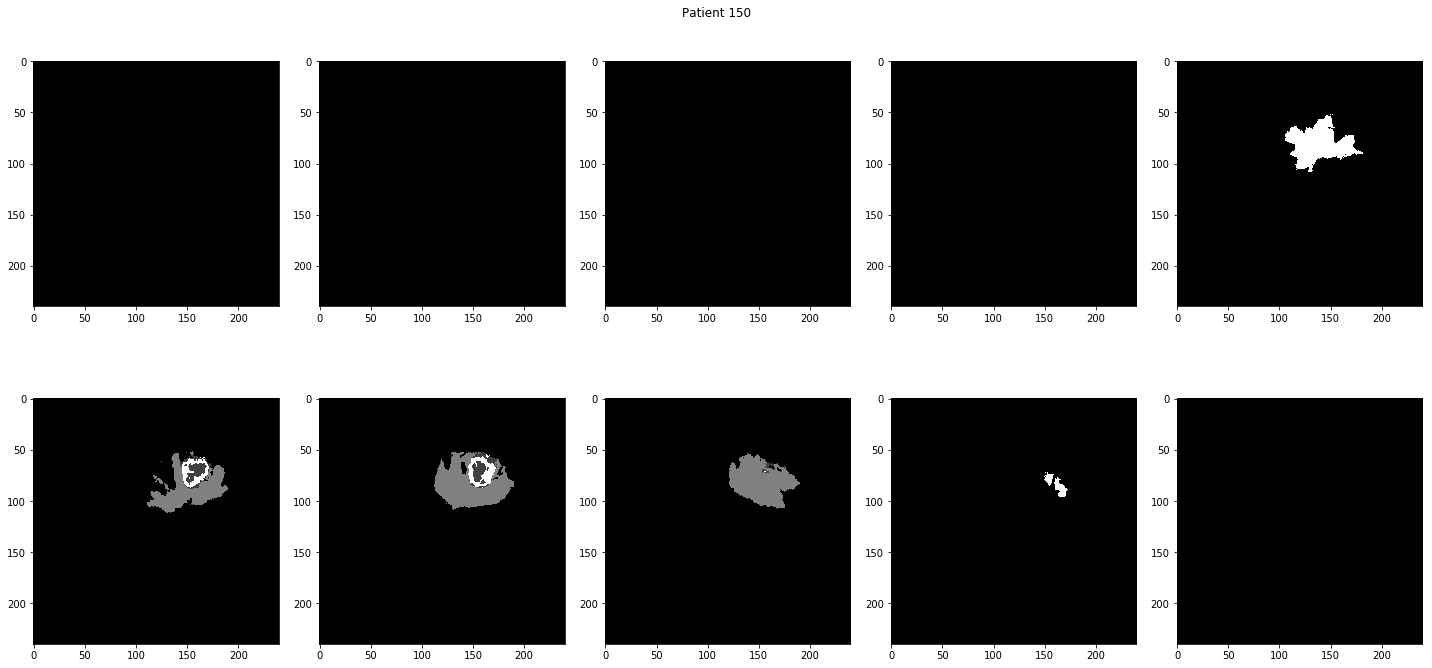

In [2]:
which = 150
mod = 'training_data_segmasks_hgg'
viewPatientData(hdf5_file, patient=which, mod=mod)

rect = bbox_3D(hdf5_file[mod][which])
rmin, rmax, cmin, cmax, zmin, zmax = rect


In [3]:
rmin, rmax, cmin, cmax, zmin, zmax

(52, 115, 104, 190, 46, 126)

In [4]:
img = np.copy(hdf5_file[mod][which])

In [5]:
img[rmin:rmax, cmin:cmax, zmin:zmax].shape

(63, 86, 80)

In [6]:
from modules.vizhelpercode import viewArbitraryVolume

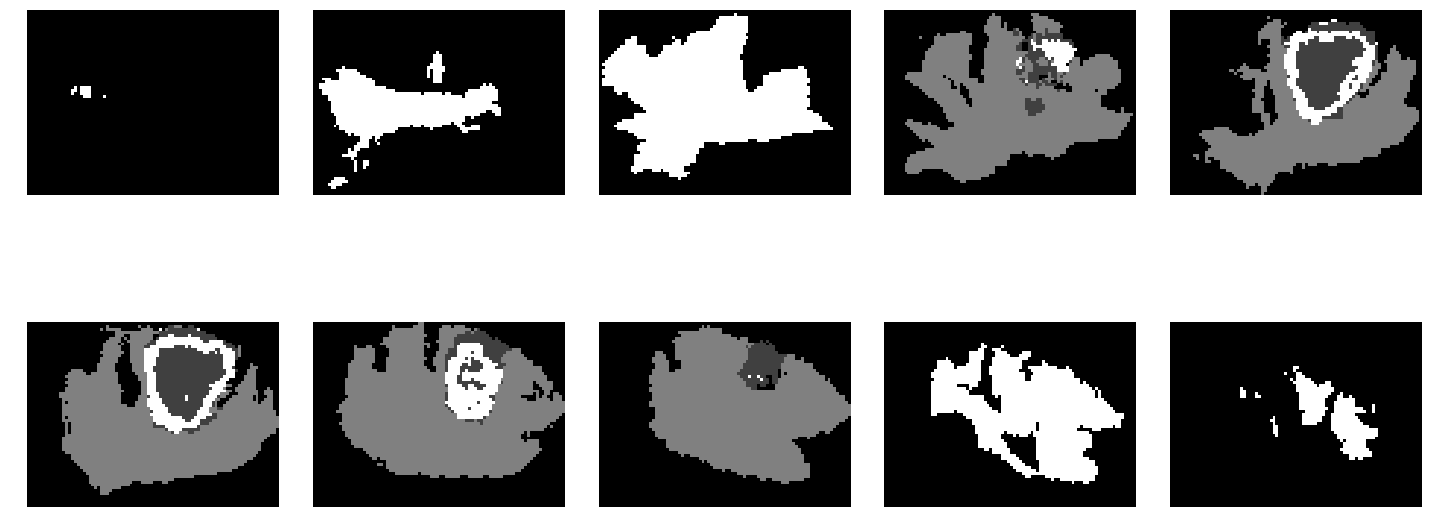

In [7]:
viewArbitraryVolume(img[rmin:rmax, cmin:cmax, zmin:zmax], slice_idx=2)

In [8]:
hdf5_file['training_data_hgg_pat_name'][which]

'Brats17_CBICA_ASV_1'

# Visualize rectangle in all views, in 2D plotting

In [9]:
rect = rmin, rmax, cmin, cmax, zmin, zmax

In [10]:
from modules.mischelpers import Rect3D

In [11]:
rect_obj = Rect3D(rect)

In [12]:
from modules.vizhelpercode import viewRectangleInAllSegViews

plotting along axis 0


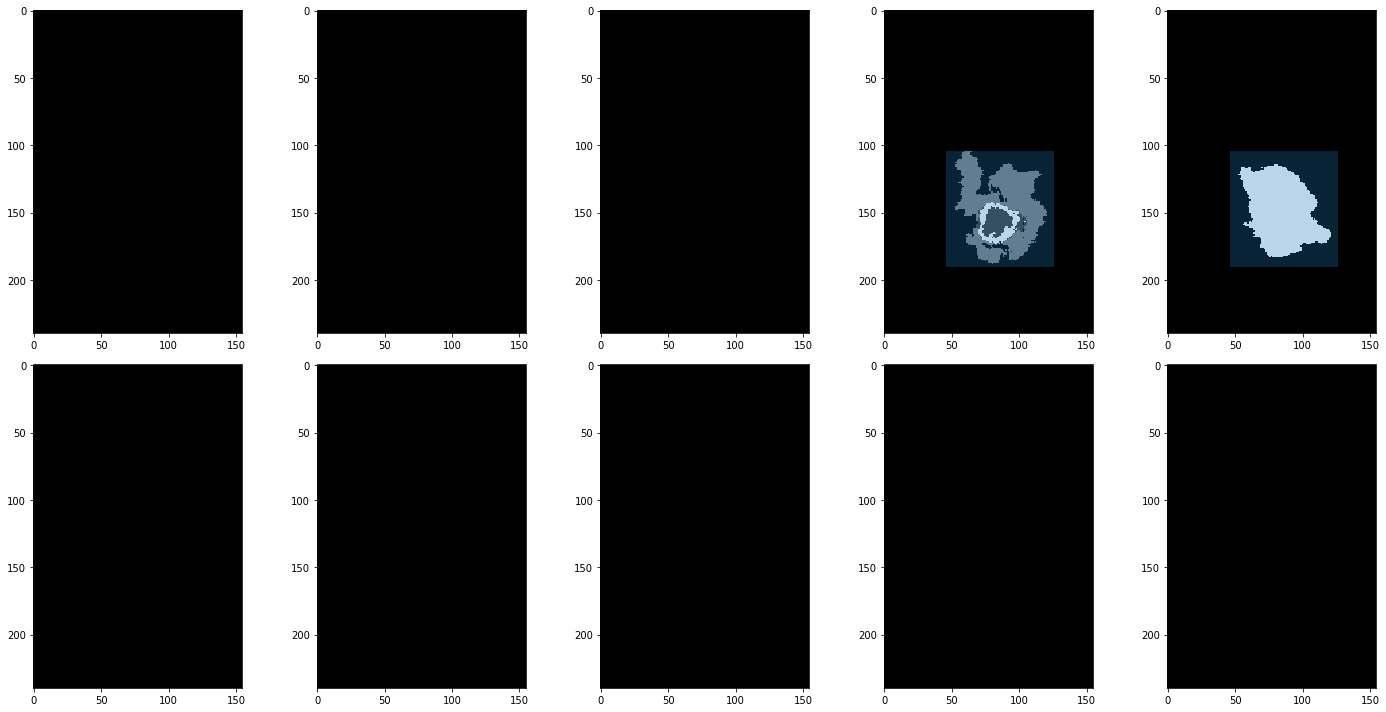

plotting along axis 1


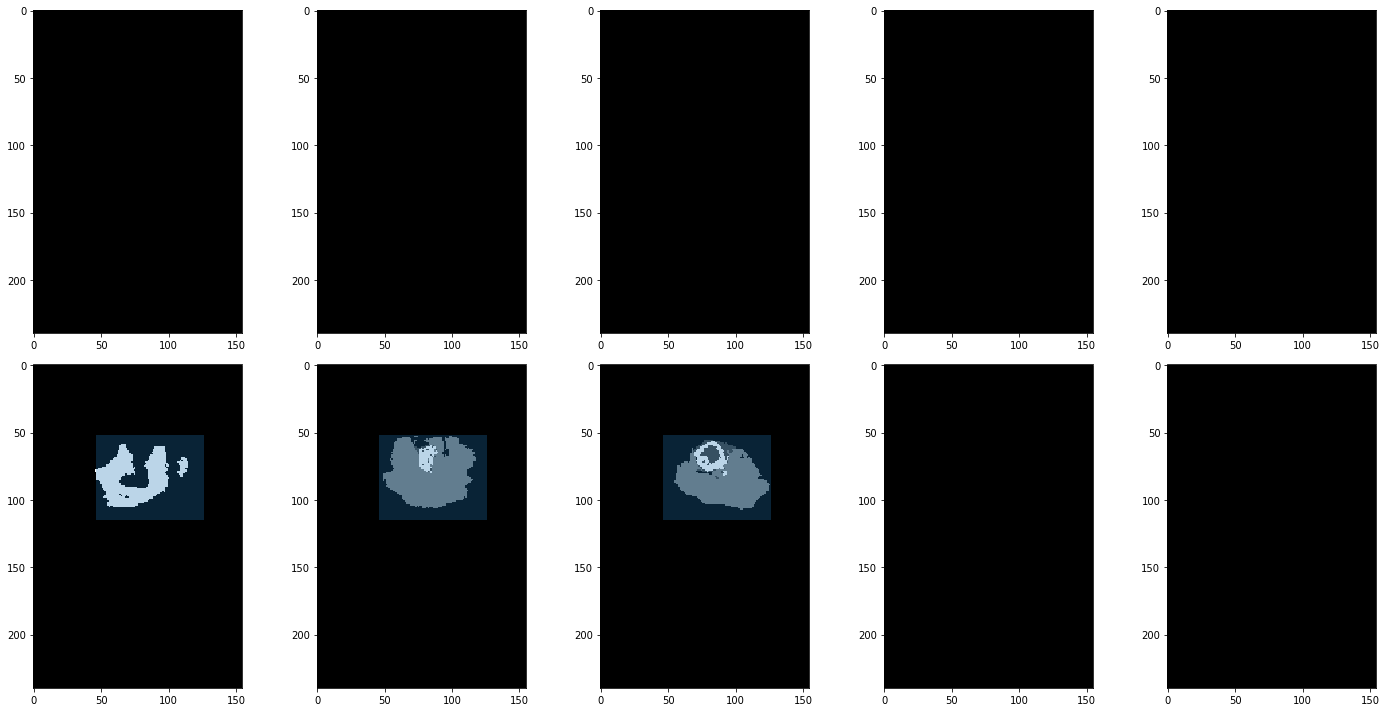

plotting along axis 2


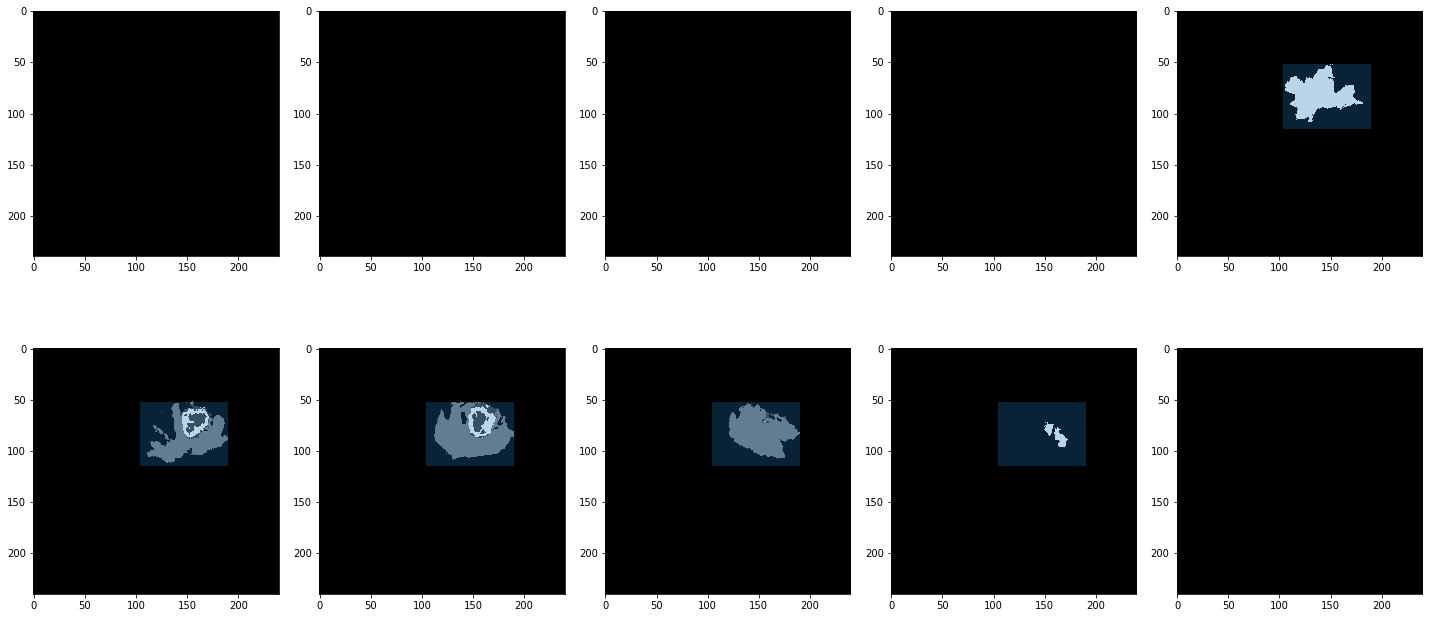

In [14]:
viewRectangleInAllSegViews(img, rect=rect_obj)